# 1. Logistic Regression with Numpy[20 points]

Load Data

In [36]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import numpy as np
import numpy.linalg as la

def loadData():
    with np.load('/content/drive/Othercomputers/my_mac_air/AI/ece421/assignment1/notMNIST.npz') as dataset:
        Data, Target = dataset['images'], dataset['labels']
        posClass = 2
        negClass = 9
        dataIndx = (Target == posClass) + (Target == negClass)
        Data = Data[dataIndx] / 255.
        Target = Target[dataIndx].reshape(-1, 1)
        Target[Target == posClass] = 1
        Target[Target == negClass] = 0
        np.random.seed(421)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data, Target = Data[randIndx], Target[randIndx]
        trainData, trainTarget = Data[:3500], Target[:3500]
        validData, validTarget = Data[3500:3600], Target[3500:3600]
        testData, testTarget = Data[3600:], Target[3600:]
    return trainData, validData, testData, trainTarget, validTarget, testTarget


## 1.1 Loss function and gradient


First Define the logistic function sigmoid
 $\theta(s)=\frac{e^{s}}{1+e^{s}}$ for later use

In [38]:
def sigmoid(s):
    return np.exp(s) / (1+ np.exp(s))
# sigmoid(0)

The loss function is defined as
$\begin{aligned}
\mathcal{L} &=\mathcal{L}_{\mathrm{CE}}+\mathcal{L}_{\mathrm{w}} \\
&=\frac{1}{N} \sum_{n=1}^{N}\left[-y^{(n)} \log \hat{y}\left(\mathbf{x}^{(n)}\right)-\left(1-y^{(n)}\right) \log \left(1-\hat{y}\left(\mathbf{x}^{(n)}\right)\right)\right]+\frac{\lambda}{2}\|\mathbf{w}\|_{2}^{2}
\end{aligned}$

In [39]:
def loss(w, b, x, y, reg):
    # Your implementation here
    y_est = sigmoid(np.dot(x, w) + b) # estimated value
    N = np.shape(x)[0] # dimension of input

    ce_loss = np.sum(-np.multiply(y, np.log(y_est)) - np.multiply(1 - y, np.log(1 - y_est))) / np.shape(y)[0] # cross entropy loss

    w_loss = (reg / 2.0) * la.norm(w, 2)**2 # regularization term L_w
    tot_loss= ce_loss + w_loss    

    return tot_loss 


The gradient with respect to b is 
$$\frac{\partial L}{\partial b} = -\frac{1}{N}\sum_{n=1}^N[y_{n} - \frac{1}{1+e^{-y_{n} \mathbf{w}^{\mathrm{T}} \mathbf{x}_{n}}}]$$

The gradient with respect to W is
$$\frac{\partial L}{\partial \mathbf{w}} = -\frac{1}{N}\sum_{n=1}^N [y_{n} - \frac{1}{1+e^{-y_{n} \mathbf{w}^{\mathrm{T}} \mathbf{x}_{n}}}]\mathbf{x}^{(n)} + {\lambda}\mathbf{w}$$

In [40]:
def grad_loss(w, b, x, y, reg):
    # Your implementation here
    y_est = sigmoid(x.dot(w) + b) # estimated hi
    b_grad = np.sum(y_est - y) / np.shape(y)[0]
    w_grad = (np.dot(x.T, y_est - y)) / np.shape(y)[0] + reg * w
    return w_grad, b_grad

Testing loss and grad_loss (deleted)

In [41]:
 # loadData returns trainData, validData, testData, trainTarget, validTarget, testTarget
data = loadData()
train_data, train_label = data[0], data[3]
train_data = np.reshape(train_data, (3500, -1))
train_label = train_label.reshape(-1)

w = np.random.rand(28 * 28)
w = w / sum(w)
b = np.random.normal(0, 1, 1)

for i in range(10):
    print(loss(w, i, train_data, train_label, 2))

prob = sigmoid(np.dot(train_data, w) + b)
def f(z): return z > 0.5
pred = f(prob).reshape(-1).astype(int)

print(pred.shape)
print(train_label.shape)
print(pred.shape[0])

correct = np.where(pred == train_label)[0].size
print(correct)
print(correct / np.shape(pred)[0])
print()

0.7101337815604509
0.9055782881743075
1.2639452633106554
1.7051474787729535
2.1813976309099665
2.6712734150901367
3.166267668105854
3.6631595932590955
4.1607516400256745
4.658601519700663
(3500,)
(3500,)
3500
1757
0.502



In [42]:
def evaluate_prediction (w, b, x, label): # evaluate accuracy rate
    prob = sigmoid(np.dot(x, w) + b)
    predict = prob > 0.5
    correct = np.where(predict == label)[0].size 
    return correct / np.shape(predict)[0] # correct estimation out of all sample

In [43]:
import matplotlib.pyplot as plt

def plot_curves(reg, lr, train_acc, train_loss, val_acc, val_loss, test_acc, test_loss, plot_train, plot_val, plot_test):
    #$ Loss Plot
    # accuracy and lost are for each iteration
    n = len(train_acc) # number of epoch
    
    plt.figure(figsize=(12, 8))
    plt.title(f"Loss Plot | Regularizer = {reg} and Learning Rate = {lr}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    if plot_train:
        plt.plot(range(1, 1 + n), train_loss, 'g', label="Train")
    if plot_val:
        plt.plot(range(1, 1 + n), val_loss, 'b', label="Validation")
    if plot_test:
        plt.plot(range(1, 1 + n), test_loss, 'r', label="Test")
    plt.legend(loc='best')
    plt.show()

    #$ Loss statistics
    print(f"Training Loss: {train_loss[-1]}")
    print(f"Validation Loss: {val_loss[-1]}")
    print(f"Testing Loss: {test_loss[-1]}")

    #$ Accuracy Plot
    plt.figure(figsize=(12, 8))
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy Plot with Regression rate = {reg} and Learning Rate = {lr}")
    if plot_train:
        plt.plot(range(1, 1 + n), train_acc, 'g', label="Train")
    if plot_val:
        plt.plot(range(1, 1 + n), val_acc, 'b', label="Validation")
    if plot_test:
        plt.plot(range(1, 1 + n), test_acc, 'r', label="Test")
    plt.legend(loc='best')
    plt.show()

    #$ Accuracy statistics
    print(f"Training Accuracy: {train_acc[-1]}")
    print(f"Validation Accuracy: {val_acc[-1]}")
    print(f"Testing Accuracy: {test_acc[-1]}")

## 1.2 Gradient Descent Implementation [6 pts]

In [45]:
def grad_descent(w, b, train_data, train_label, lr, epochs, reg, error_tol, val_data, val_label, test_data, test_label, plot_train, plot_val, plot_test):
    train_acc, val_acc, train_loss, val_loss, test_acc, test_loss = [], [], [], [], [], []

    # reshape the data
    train_data = train_data.reshape(np.shape(train_data)[0], np.shape(train_data)[1] * np.shape(train_data)[2])
    train_label = train_label.reshape(-1)

    val_data = val_data.reshape(np.shape(val_data)[0], np.shape(val_data)[1] * np.shape(val_data)[2])
    val_label = val_label.reshape(-1)

    test_data = test_data.reshape(np.shape(test_data)[0], np.shape(test_data)[1] * np.shape(test_data)[2])
    test_label = test_label.reshape(-1)


    for e in range(0, epochs):
        #$ Calculate loss and accuracy for train, validation, and test data
        train_l = loss(w, b, train_data, train_label, reg)
        train_loss.append(train_l)
        train_a = evaluate_prediction(w, b, train_data, train_label)
        train_acc.append(train_a)

        val_l = loss(w, b, val_data, val_label, reg)
        val_loss.append(val_l)
        val_a = evaluate_prediction(w, b, val_data, val_label)
        val_acc.append(val_a)


        test_l = loss(w, b, test_data, test_label, reg)
        test_loss.append(test_l)
        test_a = evaluate_prediction(w, b, test_data, test_label)
        test_acc.append(test_a)

        #$ Update gradient
        weight_grad, bias_grad = grad_loss(w, b, train_data, train_label, reg)

        new_weight = w - lr * weight_grad
        new_bias = b - lr * bias_grad

        #$ Check tolerance
        if np.linalg.norm(new_weight - w) <= error_tol:
            break
        w = new_weight
        b = new_bias

    plot_curves(reg, lr, train_acc, train_loss, val_acc, val_loss, test_acc, test_loss, plot_train, plot_val, plot_test)

    return w, b


## 1.3 Tuning the Learning Rate [3 pts]

### Test your implementation of Gradient Descent with 5000 epochs and λ = 0. 

In [46]:
def generate_rand_w_and_b():
    w = np.random.rand(784) # 28 * 28
    w = w /sum(w)   
    b = np.random.normal(0, 1, 1)
    return w, b

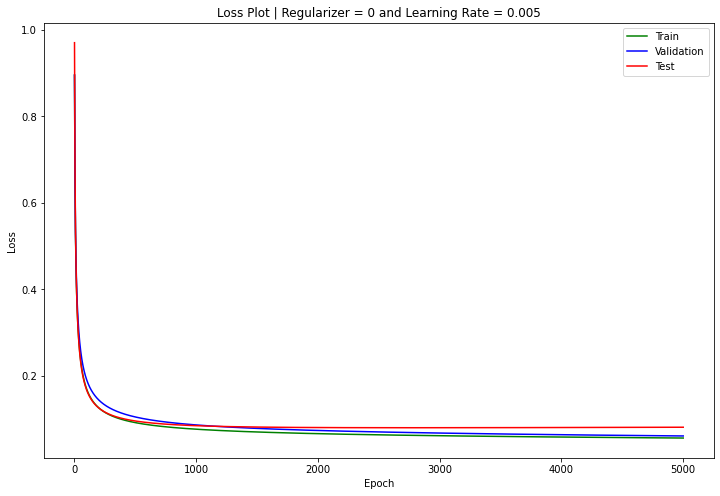

Training Loss: 0.056072848286498125
Validation Loss: 0.06087148992008823
Testing Loss: 0.08104476697392184


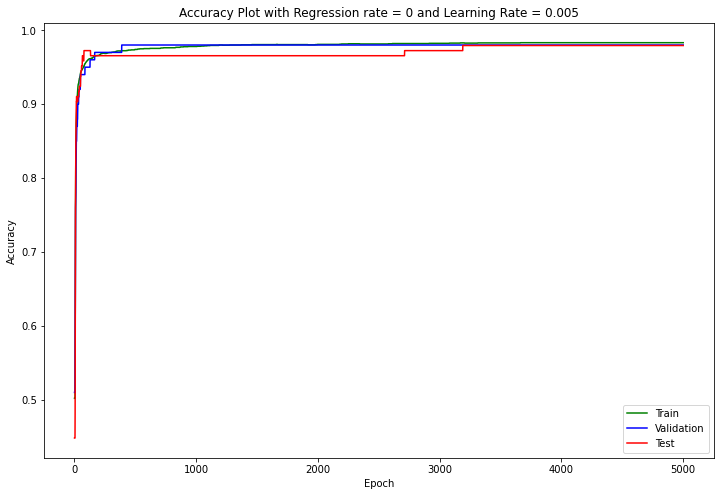

Training Accuracy: 0.9831428571428571
Validation Accuracy: 0.98
Testing Accuracy: 0.9793103448275862


In [47]:
data = loadData()
w, b = generate_rand_w_and_b()
w_opt, b_opt = grad_descent(w, b, train_data=data[0], train_label=data[3], lr=0.005, epochs=5000, reg=0, error_tol=1e-7, val_data=data[1],
                            val_label=data[4], test_data=data[2], test_label=data[5], plot_train=True, plot_val=True, plot_test=True)

### Test Investigate the impact of learning rate, $\alpha$ = { 0.005, 0.001, 0.0001 } on the performance of your classiﬁer. 

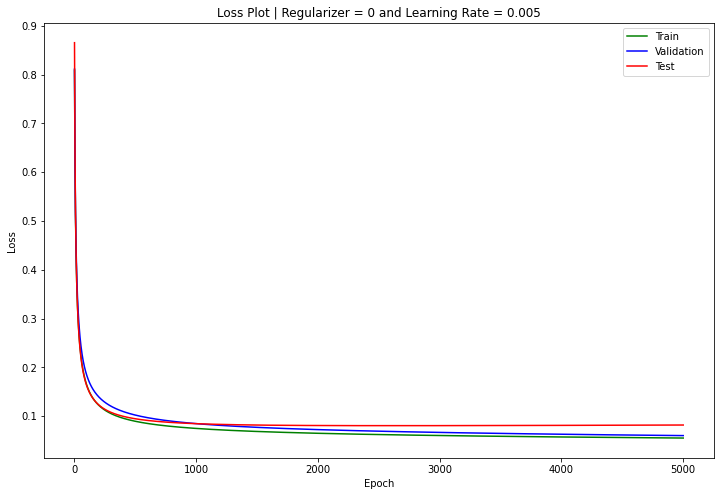

Training Loss: 0.05526737692061308
Validation Loss: 0.0602557106507015
Testing Loss: 0.08192762622108249


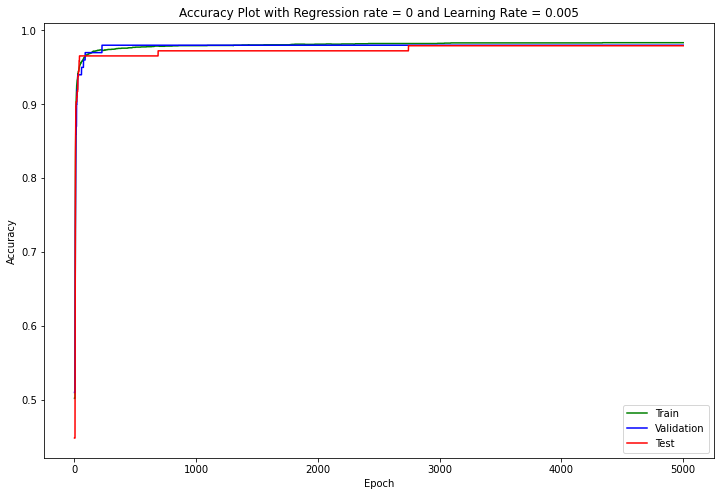

Training Accuracy: 0.9834285714285714
Validation Accuracy: 0.98
Testing Accuracy: 0.9793103448275862


In [48]:
w, b = generate_rand_w_and_b()
# lr = 0.005
w_opt, b_opt = grad_descent(w, b, train_data=data[0], train_label=data[3], lr=0.005, epochs=5000, reg=0, error_tol=1e-7, val_data=data[1],
                            val_label=data[4], test_data=data[2], test_label=data[5], plot_train=True, plot_val=True, plot_test=True)

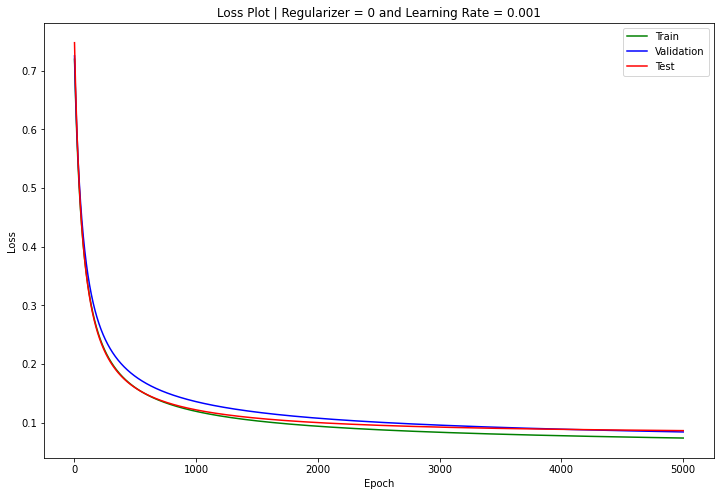

Training Loss: 0.07351621682479223
Validation Loss: 0.08390012720387631
Testing Loss: 0.08617023836163483


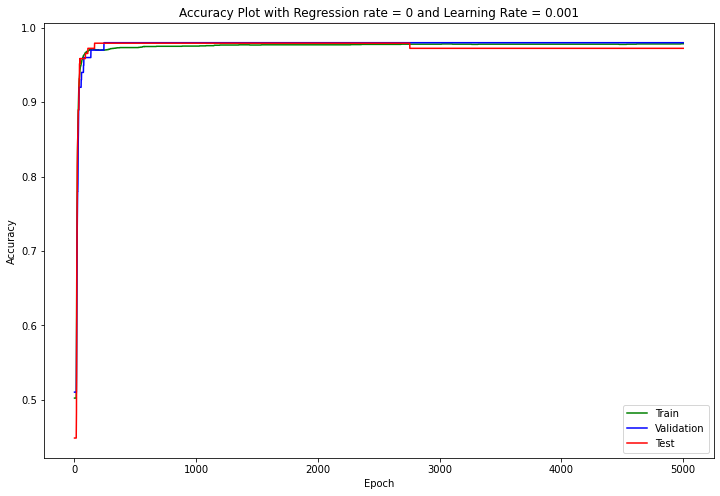

Training Accuracy: 0.9785714285714285
Validation Accuracy: 0.98
Testing Accuracy: 0.9724137931034482


In [49]:
# lr = 0.001
w, b = generate_rand_w_and_b()
w_opt, b_opt = grad_descent(w, b, train_data=data[0], train_label=data[3], lr=0.001, epochs=5000, reg=0, error_tol=1e-7, val_data=data[1],
                            val_label=data[4], test_data=data[2], test_label=data[5], plot_train=True, plot_val=True, plot_test=True)

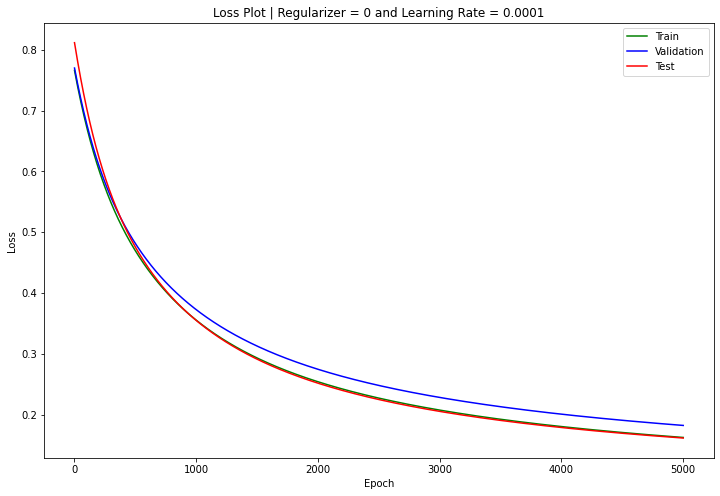

Training Loss: 0.1622322622154296
Validation Loss: 0.18200854188652393
Testing Loss: 0.16128298024147766


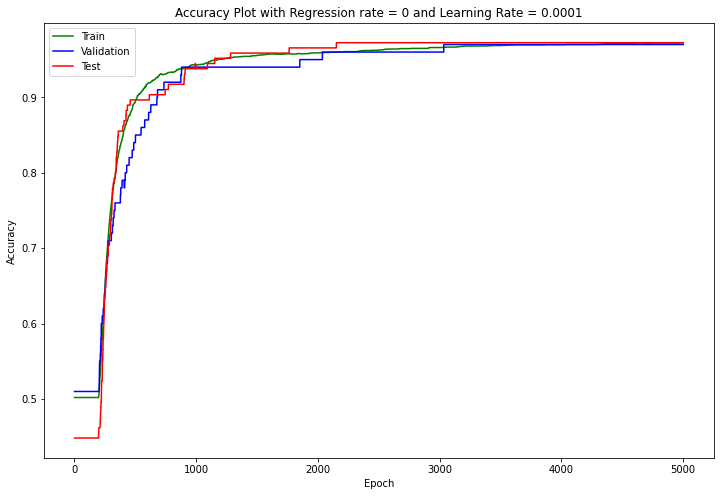

Training Accuracy: 0.9722857142857143
Validation Accuracy: 0.97
Testing Accuracy: 0.9724137931034482


In [50]:
# lr = 0.001
w, b = generate_rand_w_and_b()
w_opt, b_opt = grad_descent(w, b, train_data=data[0], train_label=data[3], lr=0.0001, epochs=5000, reg=0, error_tol=1e-7, val_data=data[1],
                            val_label=data[4], test_data=data[2], test_label=data[5], plot_train=True, plot_val=True, plot_test=True)

## 1.4 Generalization [3 pts]

### Impact of regularization parameter $\lambda$ = { 0.001, 0.1, 0.5 }

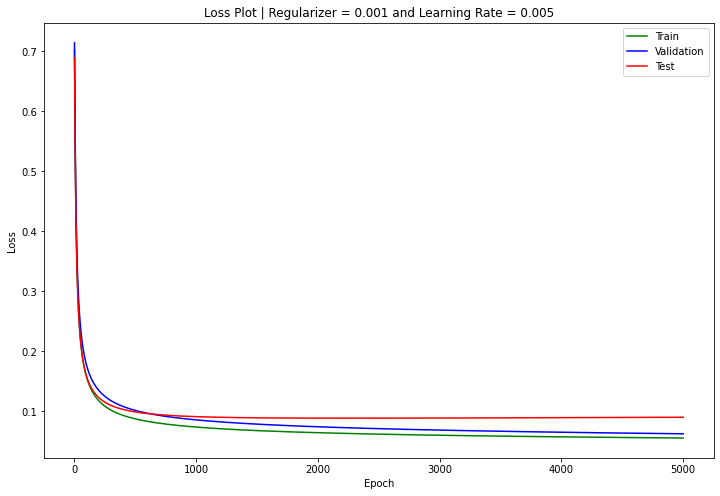

Training Loss: 0.05559546147685828
Validation Loss: 0.06265250883523821
Testing Loss: 0.09025402060248257


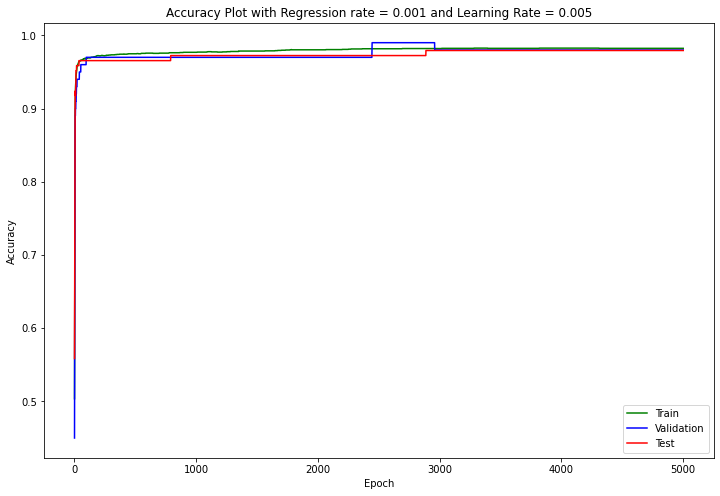

Training Accuracy: 0.9822857142857143
Validation Accuracy: 0.98
Testing Accuracy: 0.9793103448275862


In [51]:
# reg = 0.001
w, b = generate_rand_w_and_b()
w_opt, b_opt = grad_descent(w, b, train_data=data[0], train_label=data[3], lr=0.005, epochs=5000, reg=0.001, error_tol=1e-7, val_data=data[1],
                            val_label=data[4], test_data=data[2], test_label=data[5], plot_train=True, plot_val=True, plot_test=True)

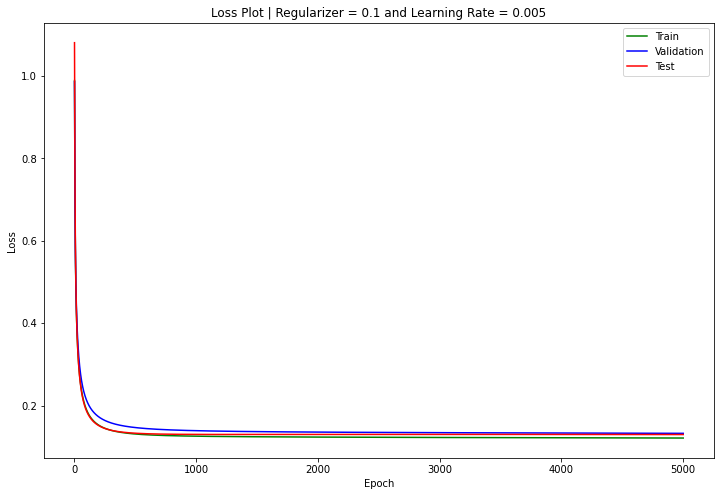

Training Loss: 0.12140237605529484
Validation Loss: 0.13279798520303765
Testing Loss: 0.12986051661786663


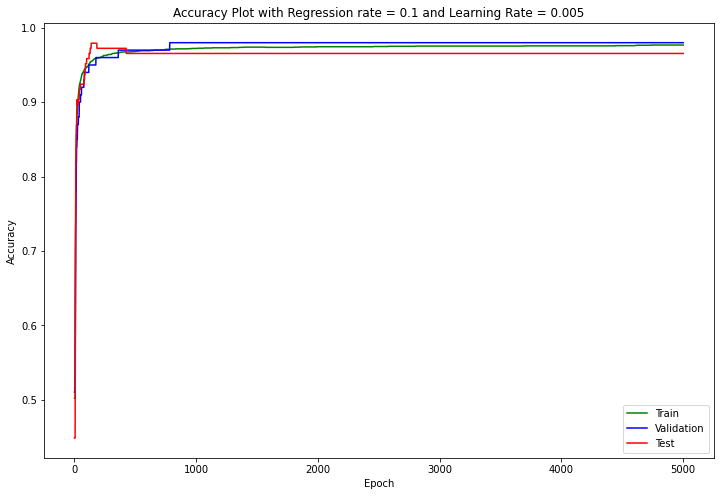

Training Accuracy: 0.9768571428571429
Validation Accuracy: 0.98
Testing Accuracy: 0.9655172413793104


In [52]:
# reg = 0.1
w, b = generate_rand_w_and_b()
w_opt, b_opt = grad_descent(w, b, train_data=data[0], train_label=data[3], lr=0.005, epochs=5000, reg=0.1, error_tol=1e-7, val_data=data[1],
                            val_label=data[4], test_data=data[2], test_label=data[5], plot_train=True, plot_val=True, plot_test=True)

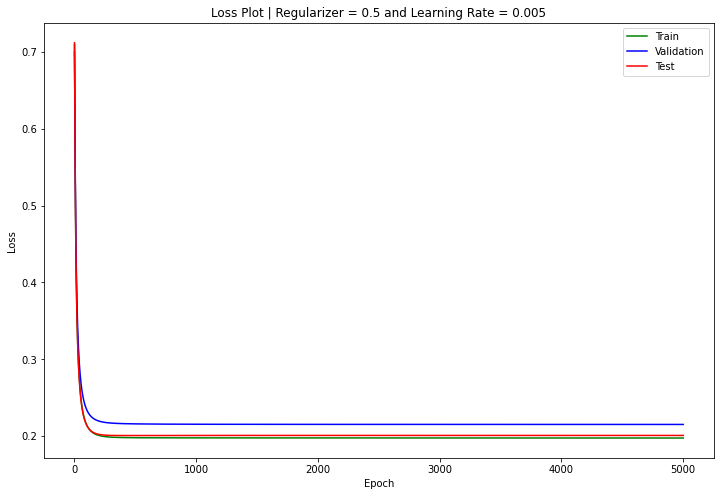

Training Loss: 0.19742777562205427
Validation Loss: 0.21511182717447405
Testing Loss: 0.20079146958128088


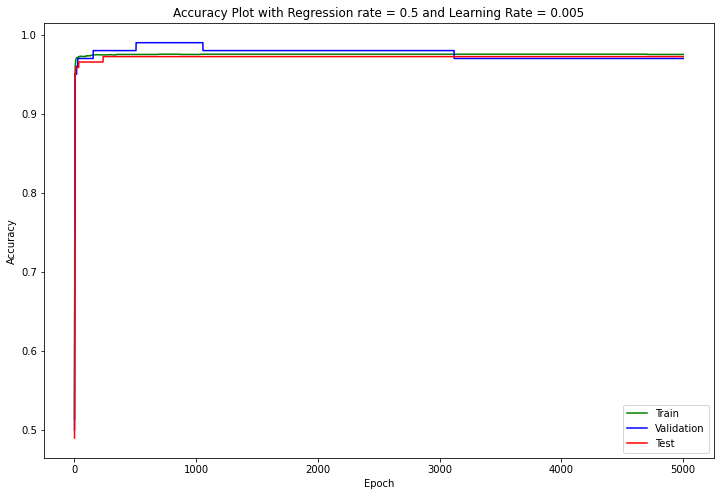

Training Accuracy: 0.9751428571428571
Validation Accuracy: 0.97
Testing Accuracy: 0.9724137931034482


In [53]:
# reg = 0.5
w, b = generate_rand_w_and_b()
w_opt, b_opt = grad_descent(w, b, train_data=data[0], train_label=data[3], lr=0.005, epochs=5000, reg=0.5, error_tol=1e-7, val_data=data[1],
                            val_label=data[4], test_data=data[2], test_label=data[5], plot_train=True, plot_val=True, plot_test=True)

# Logistic Regression in TensorFlow [20 points]

## Building the Computational Graph [5 pts]

In [54]:
#!pip install tensorflow==1.14.0
import tensorflow as tf
print(tf.__version__)
#tf.reset_default_graph()

2.7.0


In [55]:
def buildGraph(beta1, beta2, epsilon, alpha):
    w = tf.Variable(tf.random.truncated_normal([28 * 28, 1], mean=0, stddev=0.5, dtype=tf.float32, trainable=True))
    b = tf.Variable(tf.zeros(1), name='b', dtype=tf.float32, trainable=True)

    x = tf.placeholder(tf.float32, [None, 784])
    y = tf.placeholder(tf.float32, [None, 1])
    reg = tf.placeholder(tf.float32)

    logits = tf.matmul(x, w) + b

    loss = tf.losses.sigmoid_cross_entropy(multi_class_labels=y, logits=logits) + reg * tf.nn.l2_loss(w) #latter term returns half the l2 norm of w

    optimizer = tf.compat.v1.train.AdamOptimizer(alpha, beta1, beta2, epsilon).minimize(loss)

    return w, b, x, y, reg, loss, optimizer


In [56]:
def plot_curves2(reg, alpha, batchsize, b1, b2, ep, train_acc, train_loss, val_acc, val_loss, test_acc, test_loss, plot_test):
    n = len(train_acc)
    plt.figure(figsize=(20,10))
    plt.title('TF Model Loss for alpha={}, reg={}, batch={}, b1={}, b2={}, eps={}'.format(alpha,reg,batchsize,b1,b2,ep))
    plt.plot(range(1,1+n), train_loss, label="Train")
    plt.plot(range(1,1+n), val_loss, label="Validation")
    if plot_test:
        plt.plot(range(1,1+n), test_loss, label="Test")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()
    print("Final Training Loss: {}".format(train_loss[-1]))
    print("Final Validation Loss: {}".format(val_loss[-1]))
    if plot_test:
        print("Final Testing Loss: {}".format(test_loss[-1]))

    plt.figure(figsize=(20,10))
    plt.title('TF Model Accuracy for alpha={}, reg={}, batch={}, b1={}, b2={}, eps={}'.format(alpha,reg,batchsize,b1,b2,ep))
    plt.plot(range(1,1+n), train_acc, label="Train")
    plt.plot(range(1,1+n), val_acc, label="Validation")
    if plot_test:
        plt.plot(range(1,1+n), test_acc, label="Test")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()
    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    if plot_test:
        print("Final Testing Loss: {}".format(test_acc[-1]))

In [57]:
def tf_sgd(train_data, valid_data, test_data, trainTarget,validTarget, testTarget, epochs, bs, reg, lr, b1, b2, ep, plot_test):
    tf.compat.v1.set_random_seed(421)
    W, b, pred, y, loss, optim, d, r = buildGraph(lr,b1,b2,ep)
    init_op = tf.compat.v1.global_variables_initializer()

    N = train_data.shape[0]
    batches = int(N/bs)
    train_accs, val_accs, train_losses, val_losses, test_accs, test_losses = [], [], [], [], [], []

    train_data = np.reshape(train_data, (3500, -1))
    valid_data = np.reshape(valid_data, (100, -1))
    test_data = np.reshape(test_data, (145, -1))

    with tf.compat.v1.Session() as sess:
        sess.run(init_op)

        for e in range(0, epochs, 1):
            shuffled = np.random.permutation(N)
            train_data, trainTarget = train_data[shuffled], trainTarget[shuffled]

            train_loss = 0.0
            train_acc = 0.0

            for iter in range(0, batches, 1):
                iter *= bs
                _, train_predicts, batch_loss = sess.run([optim, pred, loss], feed_dict={r:reg, d:train_data[iter:iter+bs], y:trainTarget[iter:iter+bs]})
                batch_acc = evaluate_prediction(train_predicts, trainTarget[iter:iter+bs])
                train_loss += batch_loss
                train_acc += batch_acc

            train_acc /= batches
            train_loss /= batches

            valid_predicts,valid_loss = sess.run([pred, loss], feed_dict={r:reg, d:valid_data, y:validTarget})
            valid_acc = evaluate_prediction(valid_predicts, validTarget)

            test_predicts,test_loss = sess.run([pred, loss], feed_dict={r:reg, d:test_data, y:testTarget})
            test_acc = evaluate_prediction(test_predicts, testTarget)
                
            train_accs.append(train_acc)
            train_losses.append(train_loss)
            val_accs.append(valid_acc)
            val_losses.append(valid_loss)
            test_accs.append(test_acc)
            test_losses.append(test_loss)

        sess.close()

    plot_curves2(reg, lr, bs, b1, b2, ep, train_accs, train_losses, val_accs, val_losses, test_accs, test_losses, plot_test)   

In [58]:
train_data, valid_data, test_data, trainTarget, validTarget, testTarget = loadData()

epochs = 700
batchsize = 500
reg = 0
lr = 0.001
b1 = 0.9
b2 = 0.999
ep = 1e-08

tf_sgd(train_data, valid_data, test_data, trainTarget,validTarget, testTarget, epochs, batchsize, reg, lr, b1, b2, ep, 0)

TypeError: ignored

In [ ]:
# reg = 0.1
w, b = generate_rand_w_and_b()
w_opt, b_opt = grad_descent(w, b, train_data=data[0], train_label=data[3], lr=0.005, epochs=5000, reg=0.1, error_tol=1e-7, val_data=data[1],
                            val_label=data[4], test_data=data[2], test_label=data[5], plot_train=True, plot_val=True, plot_test=True)

In [ ]:
# reg = 0.5
w, b = generate_rand_w_and_b()
w_opt, b_opt = grad_descent(w, b, train_data=data[0], train_label=data[3], lr=0.005, epochs=5000, reg=0.5, error_tol=1e-7, val_data=data[1],
                            val_label=data[4], test_data=data[2], test_label=data[5], plot_train=True, plot_val=True, plot_test=True)

# Logistic Regression in TensorFlow [20 points]

## Building the Computational Graph [5 pts]

In [ ]:
#!pip install tensorflow==1.14.0
import tensorflow as tf
print(tf.__version__)
#tf.reset_default_graph()


def buildGraph(lr, bias, reg, b1, b2, eps):
    train_data = tf.compat.v1.placeholder(tf.float32, (None, 784))
    valid_data = tf.compat.v1.placeholder(tf.float32, (None, 784))
    test_data = tf.compat.v1.placeholder(tf.float32, (None, 784))

    train_label = tf.compat.v1.placeholder(tf.float32, (None, 1))
    valid_label = tf.compat.v1.placeholder(tf.float32, (None, 1))
    test_label = tf.compat.v1.placeholder(tf.float32, (None, 1))

    weight = tf.Variable(tf.random.truncated_normal(shape=(28 * 28, 1), stddev=0.5), dtype=tf.float32)
    
    bias = tf.Variable(initial_value=0, dtype=tf.float32)
    lmbda = tf.compat.v1.placeholder(reg, tf.float32)
    reg_loss = (lmbda / 2.0) * tf.matmul(weight, tf.transpose(weight))
    y_est = tf.matmul(train_data, tf.transpose(weight)) + bias
    
    ce_loss = tf.reduce_sum(tf.losses.sigmoid_cross_entropy(multi_class_labels=train_label, logits=y_est))
    ce_loss += reg_loss

    optim = tf.compat.v1.train.AdamOptimizer(learning_rate=lr, beta1=b1, beta2=b2, epsilon=eps)
    optim = optim.minimize(loss=ce_loss)

    return weight, bias, train_data, y_est, train_label, ce_loss, optim, 

In [ ]:
def buildGraph(beta1, beta2, epsilon, alpha):
    w = tf.Variable(tf.random.truncated_normal([28 * 28, 1], mean=0, stddev=0.5, dtype=tf.float32, trainable=True))
    b = tf.Variable(tf.zeros(1), dtype=tf.float32, trainable=True)

    x = tf.placeholder(tf.float32, [None, 784])
    y = tf.placeholder(tf.float32, [None, 1])
    reg = tf.placeholder(tf.float32)

    logits = tf.matmul(x, w) + b

    loss = tf.losses.sigmoid_cross_entropy(multi_class_labels=y, logits=logits) + reg * tf.nn.l2_loss(w) #latter term returns half the l2 norm of w

    optimizer = tf.compat.v1.train.AdamOptimizer(alpha, beta1, beta2, epsilon).minimize(loss)

    return w, b, x, y, reg, loss, optimizer


In [ ]:
def tf_sgd(train_data, valid_data, test_data, trainTarget,validTarget, testTarget, epochs, bs, reg, lr, b1, b2, ep, plot_test):
    tf.compat.v1.set_random_seed(421)
    W, b, pred, y, loss, optim, d, r = buildGraph(lr,b1,b2,ep)
    init_op = tf.compat.v1.global_variables_initializer()

    N = train_data.shape[0]
    batches = int(N/bs)
    train_accs, val_accs, train_losses, val_losses, test_accs, test_losses = [], [], [], [], [], []

    train_data = np.reshape(train_data, (3500, -1))
    valid_data = np.reshape(valid_data, (100, -1))
    test_data = np.reshape(test_data, (145, -1))

    with tf.compat.v1.Session() as sess:
        sess.run(init_op)

        for e in range(0, epochs, 1):
            shuffled = np.random.permutation(N)
            train_data, trainTarget = train_data[shuffled], trainTarget[shuffled]

            train_loss = 0.0
            train_acc = 0.0

            for iter in range(0, batches, 1):
                iter *= bs
                _, train_predicts, batch_loss = sess.run([optim, pred, loss], feed_dict={r:reg, d:train_data[iter:iter+bs], y:trainTarget[iter:iter+bs]})
                batch_acc = evaluate_prediction(train_predicts, trainTarget[iter:iter+bs])
                train_loss += batch_loss
                train_acc += batch_acc

            train_acc /= batches
            train_loss /= batches

            valid_predicts,valid_loss = sess.run([pred, loss], feed_dict={r:reg, d:valid_data, y:validTarget})
            valid_acc = evaluate_prediction(valid_predicts, validTarget)

            test_predicts,test_loss = sess.run([pred, loss], feed_dict={r:reg, d:test_data, y:testTarget})
            test_acc = evaluate_prediction(test_predicts, testTarget)
                
            train_accs.append(train_acc)
            train_losses.append(train_loss)
            val_accs.append(valid_acc)
            val_losses.append(valid_loss)
            test_accs.append(test_acc)
            test_losses.append(test_loss)

        sess.close()

    plot_curves2(reg, lr, bs, b1, b2, ep, train_accs, train_losses, val_accs, val_losses, test_accs, test_losses, plot_test)   